# Projet 2 - Préparez des données pour un organisme de santé publique

## Analyse et création d'un dataset clean

Le but de ce notebook est d'analyser le jeu de données initial et de le traiter afin de produire un dataset "clean", exporté en csv, qui sera la base du travail de machine learning consécutif.


In [1]:
import pandas as pd
from MLUtils import DataAnalysis, DataEngineering

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importation du jeu de données
df = pd.read_csv('data/fr.openfoodfacts.org.products.csv', sep='\t')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [4]:
df.shape

(320772, 162)

# Enlever les colonnes non significatives pour nos besoins

Des colonnes comme 'code' ou 'url' ne sont pas utiles pour nos analyses, et pour la création d'un modèle de machine learning. Nous allons donc les enlever manuellement du jeu de données.


In [5]:
columns_to_remove = ['code', 'url', 'creator', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'created_t','serving_size','pnns_groups_1' ,'pnns_groups_2' ,'main_category_fr' ,'additives','additives_tags','additives_fr','quantity','ingredients_text','allergens','traces','traces_tags','traces_fr', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'generic_name', 'brands', 'brands_tags', 'packaging', 'packaging_tags', 'categories', 'categories_tags', 'categories_fr', 'labels_fr', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_fr', 'states', 'states_tags', 'states_fr', 'main_category', 'image_url', 'image_small_url']

df = df.drop(columns_to_remove, axis=1)

## Analyse des champs manquants du dataset original


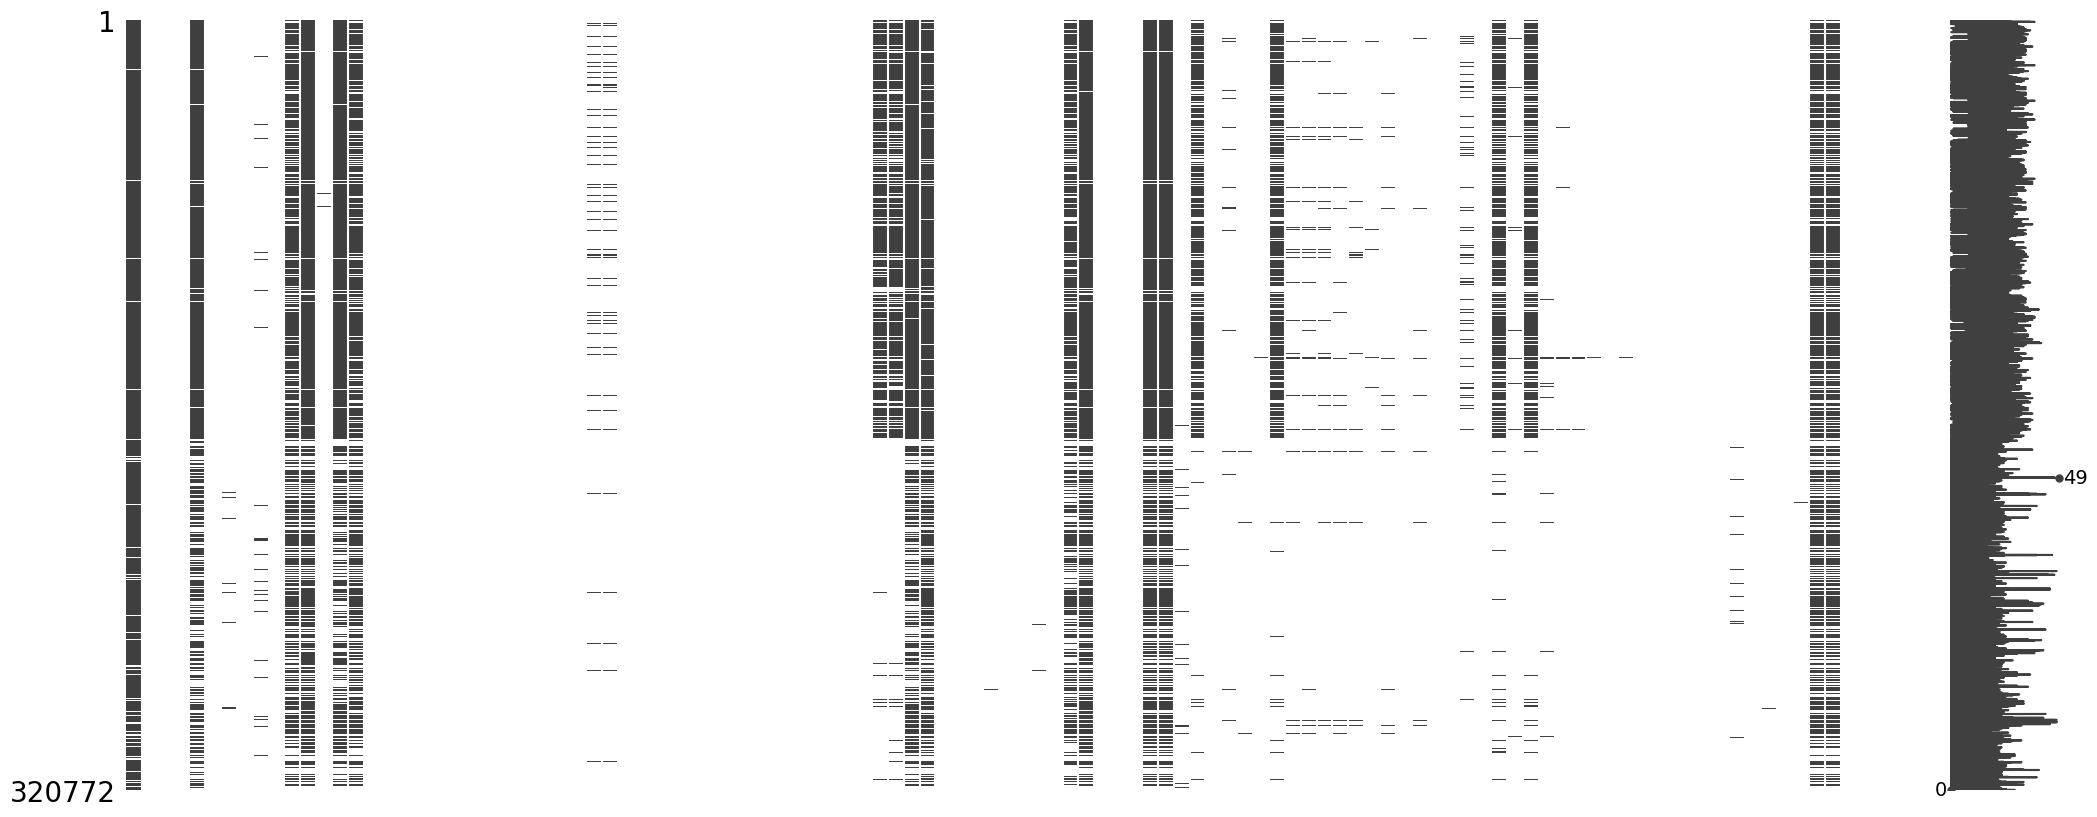

In [6]:
DataAnalysis.show_columns_population(df, type='matrix')

On constate qu'il y a un grand nombre de variables ayant des valeurs manquantes, nous allons donc tout d'abord les éliminer. Nous choisissons d'éliminer les colonnes qui ont moins de 10% de valeurs renseignées.


In [7]:
(df, logs, n_columns_removed) = DataEngineering.remove_columns_by_percentage(df, 0.1)

print("Nombre de colonnes supprimées : ", n_columns_removed)

logs

Nombre de colonnes supprimées :  90


['La colonne cities a été supprimée car elle ne contient que 0.01% de valeurs renseignées.',
 'La colonne allergens_fr a été supprimée car elle ne contient que 0.01% de valeurs renseignées.',
 'La colonne no_nutriments a été supprimée car elle ne contient que 0.0% de valeurs renseignées.',
 'La colonne ingredients_from_palm_oil a été supprimée car elle ne contient que 0.0% de valeurs renseignées.',
 'La colonne ingredients_from_palm_oil_tags a été supprimée car elle ne contient que 1.51% de valeurs renseignées.',
 'La colonne ingredients_that_may_be_from_palm_oil a été supprimée car elle ne contient que 0.0% de valeurs renseignées.',
 'La colonne ingredients_that_may_be_from_palm_oil_tags a été supprimée car elle ne contient que 3.65% de valeurs renseignées.',
 'La colonne nutrition_grade_uk a été supprimée car elle ne contient que 0.0% de valeurs renseignées.',
 'La colonne energy-from-fat_100g a été supprimée car elle ne contient que 0.27% de valeurs renseignées.',
 'La colonne butyr

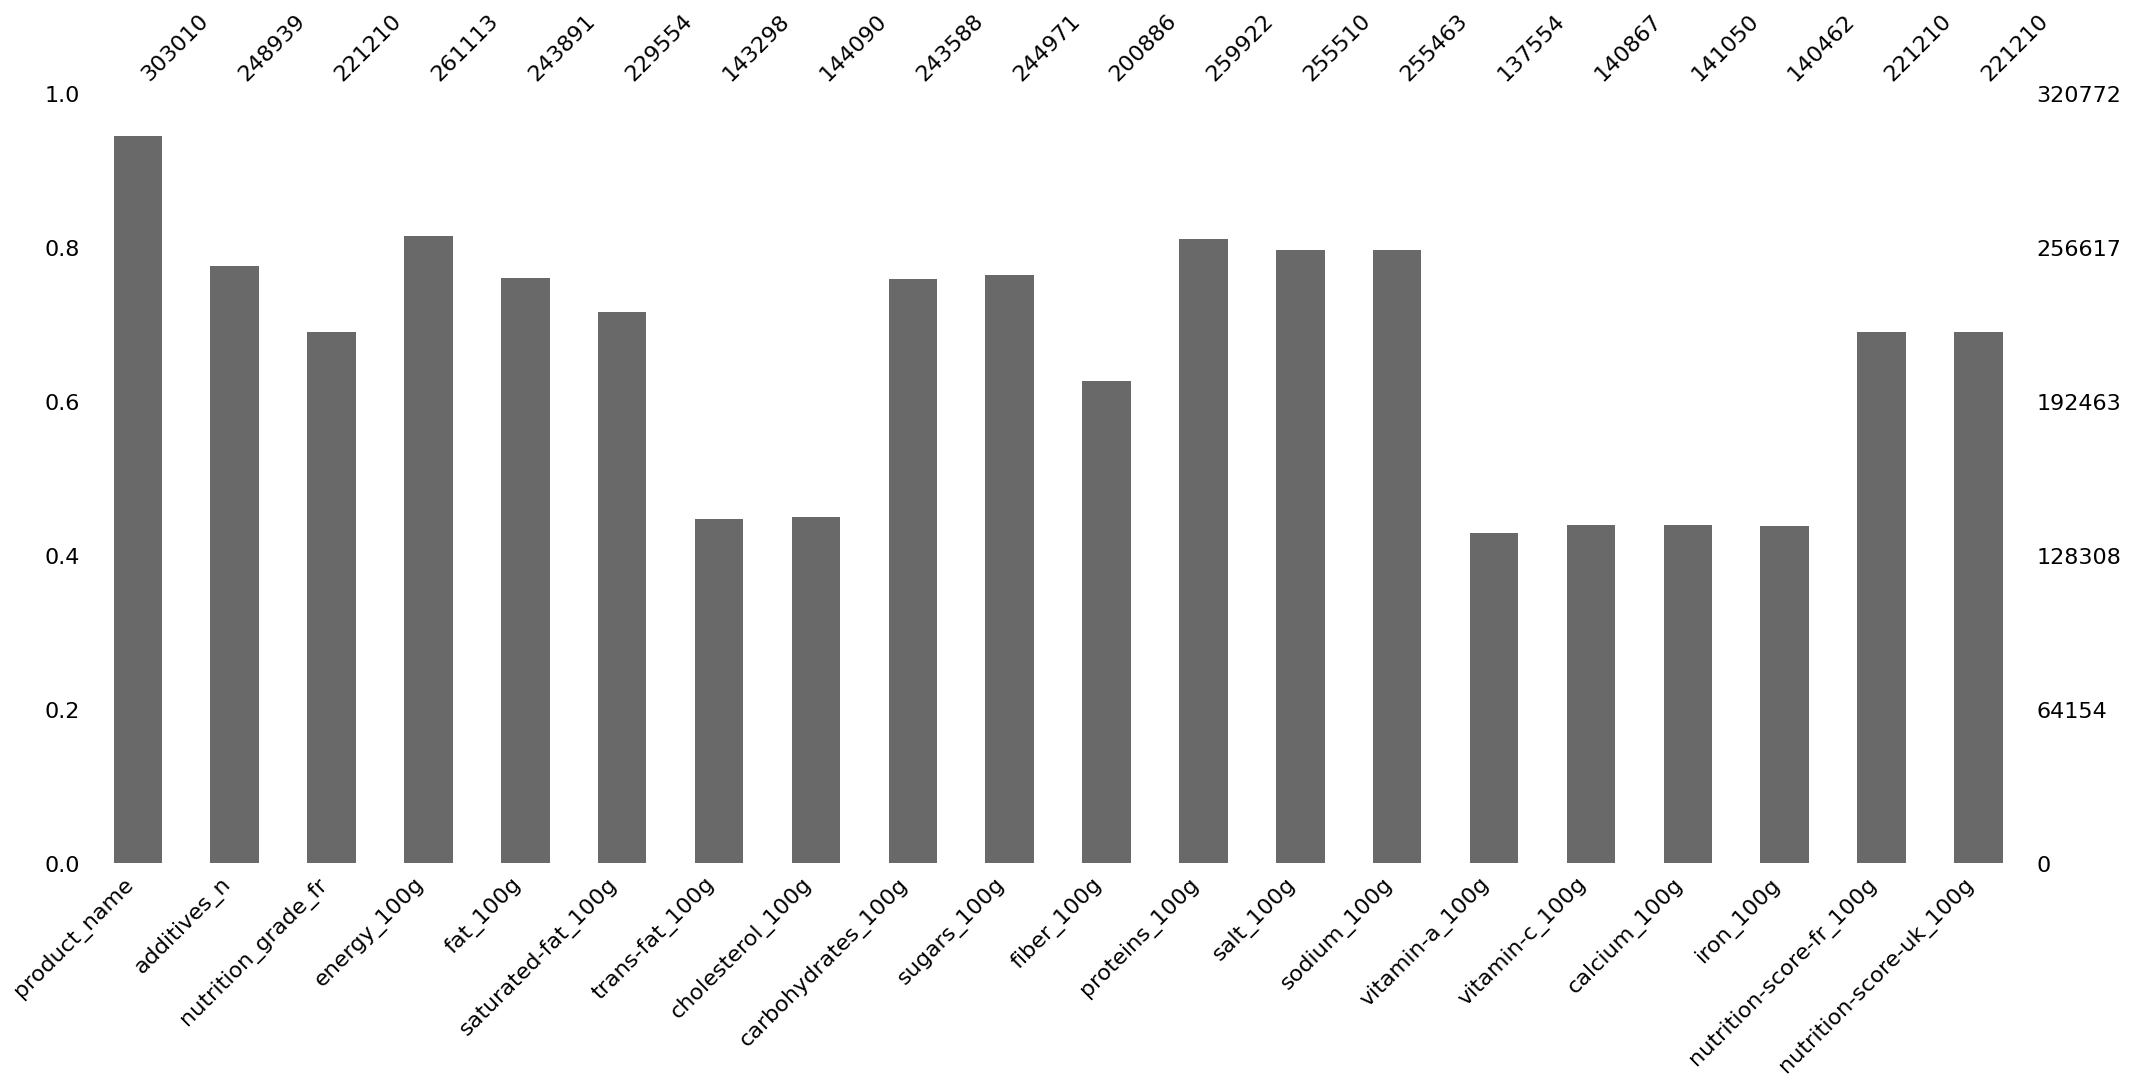

In [8]:
DataAnalysis.show_columns_population(df, type='bar')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   product_name             303010 non-null  object 
 1   additives_n              248939 non-null  float64
 2   nutrition_grade_fr       221210 non-null  object 
 3   energy_100g              261113 non-null  float64
 4   fat_100g                 243891 non-null  float64
 5   saturated-fat_100g       229554 non-null  float64
 6   trans-fat_100g           143298 non-null  float64
 7   cholesterol_100g         144090 non-null  float64
 8   carbohydrates_100g       243588 non-null  float64
 9   sugars_100g              244971 non-null  float64
 10  fiber_100g               200886 non-null  float64
 11  proteins_100g            259922 non-null  float64
 12  salt_100g                255510 non-null  float64
 13  sodium_100g              255463 non-null  float64
 14  vita

In [10]:
df.sample(10)

,product_name,additives_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
214291,La bière du Démon,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234846,Chocolat noir 70% cacao bio équitable,1.0,d,2281.0,38.00,23.00,NaN,NaN,36.00,31.00,12.30,9.70,0.00003,0.000012,NaN,NaN,NaN,NaN,17.0,17.0
65701,Classic Artisan Soup Mix,3.0,d,1485.0,0.00,0.00,0.0,0.000,77.42,9.68,6.50,9.68,3.03276,1.194000,0.00242,0.0116,0.065,0.00348,11.0,11.0
308441,Zanahorias &quot;El Valle de Madriles&quot;,0.0,NaN,167.0,0.20,NaN,NaN,NaN,6.10,NaN,NaN,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104461,Sweet & Salty Kettle Corn,1.0,d,1850.0,26.50,11.80,0.0,0.000,55.90,0.00,8.82,5.88,1.27000,0.500000,0.00000,0.0000,0.000,0.00212,15.0,15.0
103482,Granola Bars,7.0,c,1745.0,8.33,2.08,0.0,0.000,75.00,25.00,4.20,8.33,0.47752,0.188000,0.00000,0.0000,0.333,0.00300,9.0,9.0
268250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18161,Buffalo-Style Wing Sauce,2.0,c,138.0,0.00,0.00,0.0,0.000,3.33,0.00,0.00,0.00,7.70382,3.033000,0.00050,0.0000,0.000,0.00000,10.0,10.0
156281,"Crafty Cooking Kits, Cupcake Kit, Chocolate",3.0,d,1674.0,8.33,3.33,0.0,0.000,80.00,60.00,3.30,3.33,1.35382,0.533000,0.00000,0.0000,0.067,0.00240,18.0,18.0
154159,Chicken Salad Sandwich,8.0,c,883.0,10.57,3.96,0.0,0.044,18.06,1.76,0.90,11.01,0.91694,0.361000,0.00033,0.0040,0.026,0.00119,3.0,3.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   product_name             303010 non-null  object 
 1   additives_n              248939 non-null  float64
 2   nutrition_grade_fr       221210 non-null  object 
 3   energy_100g              261113 non-null  float64
 4   fat_100g                 243891 non-null  float64
 5   saturated-fat_100g       229554 non-null  float64
 6   trans-fat_100g           143298 non-null  float64
 7   cholesterol_100g         144090 non-null  float64
 8   carbohydrates_100g       243588 non-null  float64
 9   sugars_100g              244971 non-null  float64
 10  fiber_100g               200886 non-null  float64
 11  proteins_100g            259922 non-null  float64
 12  salt_100g                255510 non-null  float64
 13  sodium_100g              255463 non-null  float64
 14  vita

In [12]:
# transformer additives_n en colonne qualititative : 3 buckets :
# 'Aucun' : 0
# 'Peu' : 1 à 3
# 'Beaucoup' : 4 et plus

df['additives_n'].value_counts()

additives_n
0.0     94259
1.0     46509
2.0     36520
3.0     23680
4.0     15243
5.0     10935
6.0      7290
7.0      4702
8.0      3359
9.0      2194
10.0     1336
11.0      893
12.0      589
13.0      376
14.0      325
15.0      224
16.0      128
17.0      109
18.0       68
19.0       55
20.0       48
22.0       27
21.0       21
23.0       15
25.0       11
24.0       10
31.0        4
26.0        3
28.0        2
27.0        2
29.0        2
Name: count, dtype: int64

In [13]:
def bucketize_additives_n(x):
    if x == 0:
        return 'Aucun'
    elif x < 4:
        return 'Peu'
    elif x >= 4:
        return 'Beaucoup'
    else:
        return 'Inconnu'

# Créer la colonne additives_n_buckets
df['additives_n_buckets'] = df['additives_n'].apply(lambda x: bucketize_additives_n(x))

In [14]:
df.sample(10)

,product_name,additives_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,...,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,additives_n_buckets
270113,8 fiendish fancies,8.0,e,1614.0,9.8,4.3,NaN,NaN,70.70,57.90,...,2.7,0.56000,0.220472,NaN,NaN,NaN,NaN,20.0,20.0,Beaucoup
280012,Tartin'o,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inconnu
151889,"Pantai Norasingh, No-Sub Brand, Safe Food Dipp...",3.0,d,502.0,0.0,0.0,0.0,0.0,28.00,24.00,...,0.0,4.36880,1.720000,0.0,0.000,0.08,0.0072,11.0,11.0,Peu
185034,Lentilles préparées,0.0,a,364.0,0.5,0.1,NaN,NaN,12.00,0.60,...,7.0,0.45720,0.180000,NaN,NaN,NaN,NaN,-12.0,-12.0,Aucun
234509,GERMLINE,0.0,NaN,1598.0,12.6,NaN,NaN,NaN,62.00,NaN,...,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aucun
40476,"Glaze, Ginger",2.0,d,1255.0,0.0,0.0,0.0,NaN,73.33,46.67,...,0.0,0.00000,0.000000,NaN,0.008,NaN,0.0048,13.0,13.0,Peu
281554,Dekoration bla glimmer,3.0,d,1662.0,0.1,0.0,NaN,NaN,98.00,97.00,...,0.0,0.00300,0.001181,NaN,NaN,NaN,NaN,14.0,14.0,Peu
52839,"Juice, Apple Grape",1.0,b,209.0,0.0,0.0,0.0,0.0,12.50,11.50,...,0.0,0.02032,0.008000,NaN,0.030,NaN,NaN,2.0,2.0,Peu
201567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inconnu
10338,Soda,4.0,NaN,105.0,0.0,NaN,NaN,NaN,6.76,6.76,...,0.0,0.03810,0.015000,NaN,NaN,NaN,NaN,NaN,NaN,Beaucoup


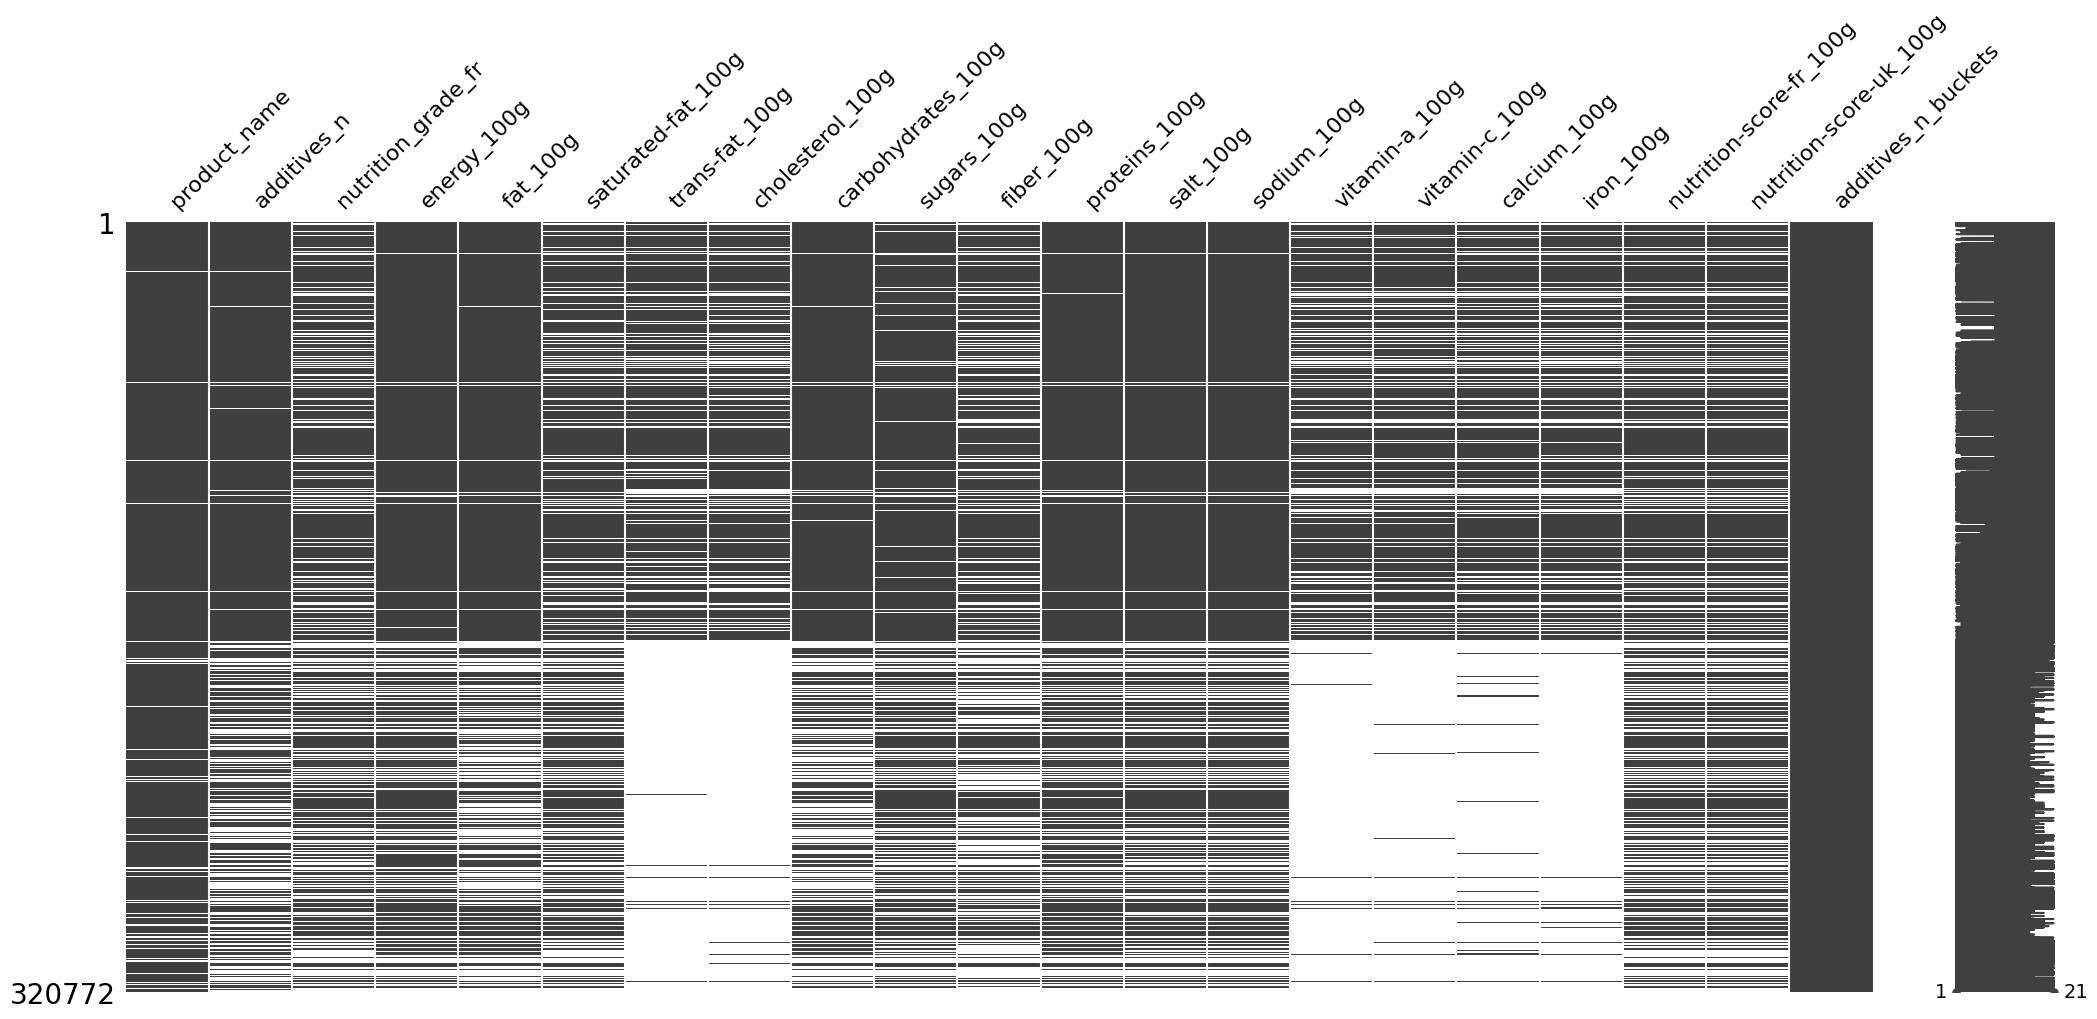

In [15]:
DataAnalysis.show_columns_population(df, type='matrix')

In [17]:
df.describe()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,248939.000000,2.611130e+05,243891.000000,229554.000000,143298.000000,144090.000000,243588.000000,244971.000000,200886.000000,259922.000000,255510.000000,255463.000000,137554.000000,140867.000000,141050.000000,140462.000000,221210.000000,221210.000000
mean,1.936024,1.141915e+03,12.730379,5.129932,0.073476,0.020071,32.073981,16.003484,2.862111,7.075940,2.028624,0.798815,0.000397,0.023367,0.125163,0.003652,9.165535,9.058049
std,2.502019,6.447154e+03,17.578747,8.014238,1.540223,0.358062,29.731719,22.327284,12.867578,8.409054,128.269454,50.504428,0.073278,2.236451,3.318263,0.214408,9.055903,9.183589
min,0.000000,0.000000e+00,0.000000,0.000000,-3.570000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,0.000000,-0.000340,-0.002100,0.000000,-0.000260,-15.000000,-15.000000
25%,0.000000,3.770000e+02,0.000000,0.000000,0.000000,0.000000,6.000000,1.300000,0.000000,0.700000,0.063500,0.025000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,1.100000e+03,5.000000,1.790000,0.000000,0.000000,20.600000,5.710000,1.500000,4.760000,0.581660,0.229000,0.000000,0.000000,0.035000,0.001010,10.000000,9.000000
75%,3.000000,1.674000e+03,20.000000,7.140000,0.000000,0.020000,58.330000,24.000000,3.600000,10.000000,1.374140,0.541000,0.000107,0.003700,0.106000,0.002400,16.000000,16.000000
max,31.000000,3.251373e+06,714.290000,550.000000,369.000000,95.238000,2916.670000,3520.000000,5380.000000,430.000000,64312.800000,25320.000000,26.700000,716.981100,694.737000,50.000000,40.000000,40.000000


In [21]:
# Remplacer les valeurs négatives par des 0 sur toutes les colonnes
def remove_negative_values(x):
    if isinstance(x, int) or isinstance(x, float):
        if x < 0:
            return 0
        else:
            return x
    else:
        return x

# On applique la lambda sur toutes les colonnes
df = df.applymap(remove_negative_values)

In [22]:
df.describe()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,248939.000000,2.611130e+05,243891.000000,229554.000000,143298.000000,144090.000000,243588.000000,244971.000000,200886.000000,259922.000000,255510.000000,255463.000000,137554.000000,140867.000000,141050.000000,140462.000000,221210.000000,221210.000000
mean,1.936024,1.141915e+03,12.730379,5.129932,0.073534,0.020071,32.073981,16.003632,2.862144,7.080955,2.028624,0.798815,0.000397,0.023367,0.125163,0.003652,9.716988,9.634289
std,2.502019,6.447154e+03,17.578747,8.014238,1.540167,0.358062,29.731719,22.327140,12.867562,8.198599,128.269454,50.504428,0.073278,2.236451,3.318263,0.214408,8.305364,8.418013
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.770000e+02,0.000000,0.000000,0.000000,0.000000,6.000000,1.300000,0.000000,0.700000,0.063500,0.025000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,1.100000e+03,5.000000,1.790000,0.000000,0.000000,20.600000,5.710000,1.500000,4.760000,0.581660,0.229000,0.000000,0.000000,0.035000,0.001010,10.000000,9.000000
75%,3.000000,1.674000e+03,20.000000,7.140000,0.000000,0.020000,58.330000,24.000000,3.600000,10.000000,1.374140,0.541000,0.000107,0.003700,0.106000,0.002400,16.000000,16.000000
max,31.000000,3.251373e+06,714.290000,550.000000,369.000000,95.238000,2916.670000,3520.000000,5380.000000,430.000000,64312.800000,25320.000000,26.700000,716.981100,694.737000,50.000000,40.000000,40.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   product_name             303010 non-null  object 
 1   additives_n              248939 non-null  float64
 2   nutrition_grade_fr       221210 non-null  object 
 3   energy_100g              261113 non-null  float64
 4   fat_100g                 243891 non-null  float64
 5   saturated-fat_100g       229554 non-null  float64
 6   trans-fat_100g           143298 non-null  float64
 7   cholesterol_100g         144090 non-null  float64
 8   carbohydrates_100g       243588 non-null  float64
 9   sugars_100g              244971 non-null  float64
 10  fiber_100g               200886 non-null  float64
 11  proteins_100g            259922 non-null  float64
 12  salt_100g                255510 non-null  float64
 13  sodium_100g              255463 non-null  float64
 14  vita

In [26]:
df_without_str_columns = df.select_dtypes(exclude=['object'])

In [32]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Initialisez l'IterativeImputer
imputer = IterativeImputer()

# Fit et transformez les données
df_imputed = imputer.fit_transform(df_without_str_columns[['energy_100g','fat_100g','saturated-fat_100g','trans-fat_100g','cholesterol_100g']])

# Remplacer les Nan par les valeurs imputed
df_without_str_columns['energy_100g'] = df_imputed[:,0]
df_without_str_columns['fat_100g'] = df_imputed[:,1]
df_without_str_columns['saturated-fat_100g'] = df_imputed[:,2]
df_without_str_columns['trans-fat_100g'] = df_imputed[:,3]
df_without_str_columns['cholesterol_100g'] = df_imputed[:,4]


In [34]:
# Initialisez l'IterativeImputer
imputer = IterativeImputer()

# Fit et transformez les données
df_imputed2 = imputer.fit_transform(df_without_str_columns[['energy_100g','fat_100g','carbohydrates_100g','sugars_100g','fiber_100g','proteins_100g']])

# Remplacer les Nan par les valeurs imputed
df_without_str_columns['energy_100g'] = df_imputed2[:,0]
df_without_str_columns['fat_100g'] = df_imputed2[:,1]
df_without_str_columns['carbohydrates_100g'] = df_imputed2[:,2]
df_without_str_columns['sugars_100g'] = df_imputed2[:,3]
df_without_str_columns['fiber_100g'] = df_imputed2[:,4]
df_without_str_columns['proteins_100g'] = df_imputed2[:,5]

In [39]:
df_without_str_columns = df_without_str_columns.drop(['salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g', 'iron_100g'], axis=1)

In [40]:
df_without_str_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   additives_n              248939 non-null  float64
 1   energy_100g              320772 non-null  float64
 2   fat_100g                 320772 non-null  float64
 3   saturated-fat_100g       320772 non-null  float64
 4   trans-fat_100g           320772 non-null  float64
 5   cholesterol_100g         320772 non-null  float64
 6   carbohydrates_100g       320772 non-null  float64
 7   sugars_100g              320772 non-null  float64
 8   fiber_100g               320772 non-null  float64
 9   proteins_100g            320772 non-null  float64
 10  nutrition-score-fr_100g  221210 non-null  float64
 11  nutrition-score-uk_100g  221210 non-null  float64
dtypes: float64(12)
memory usage: 29.4 MB


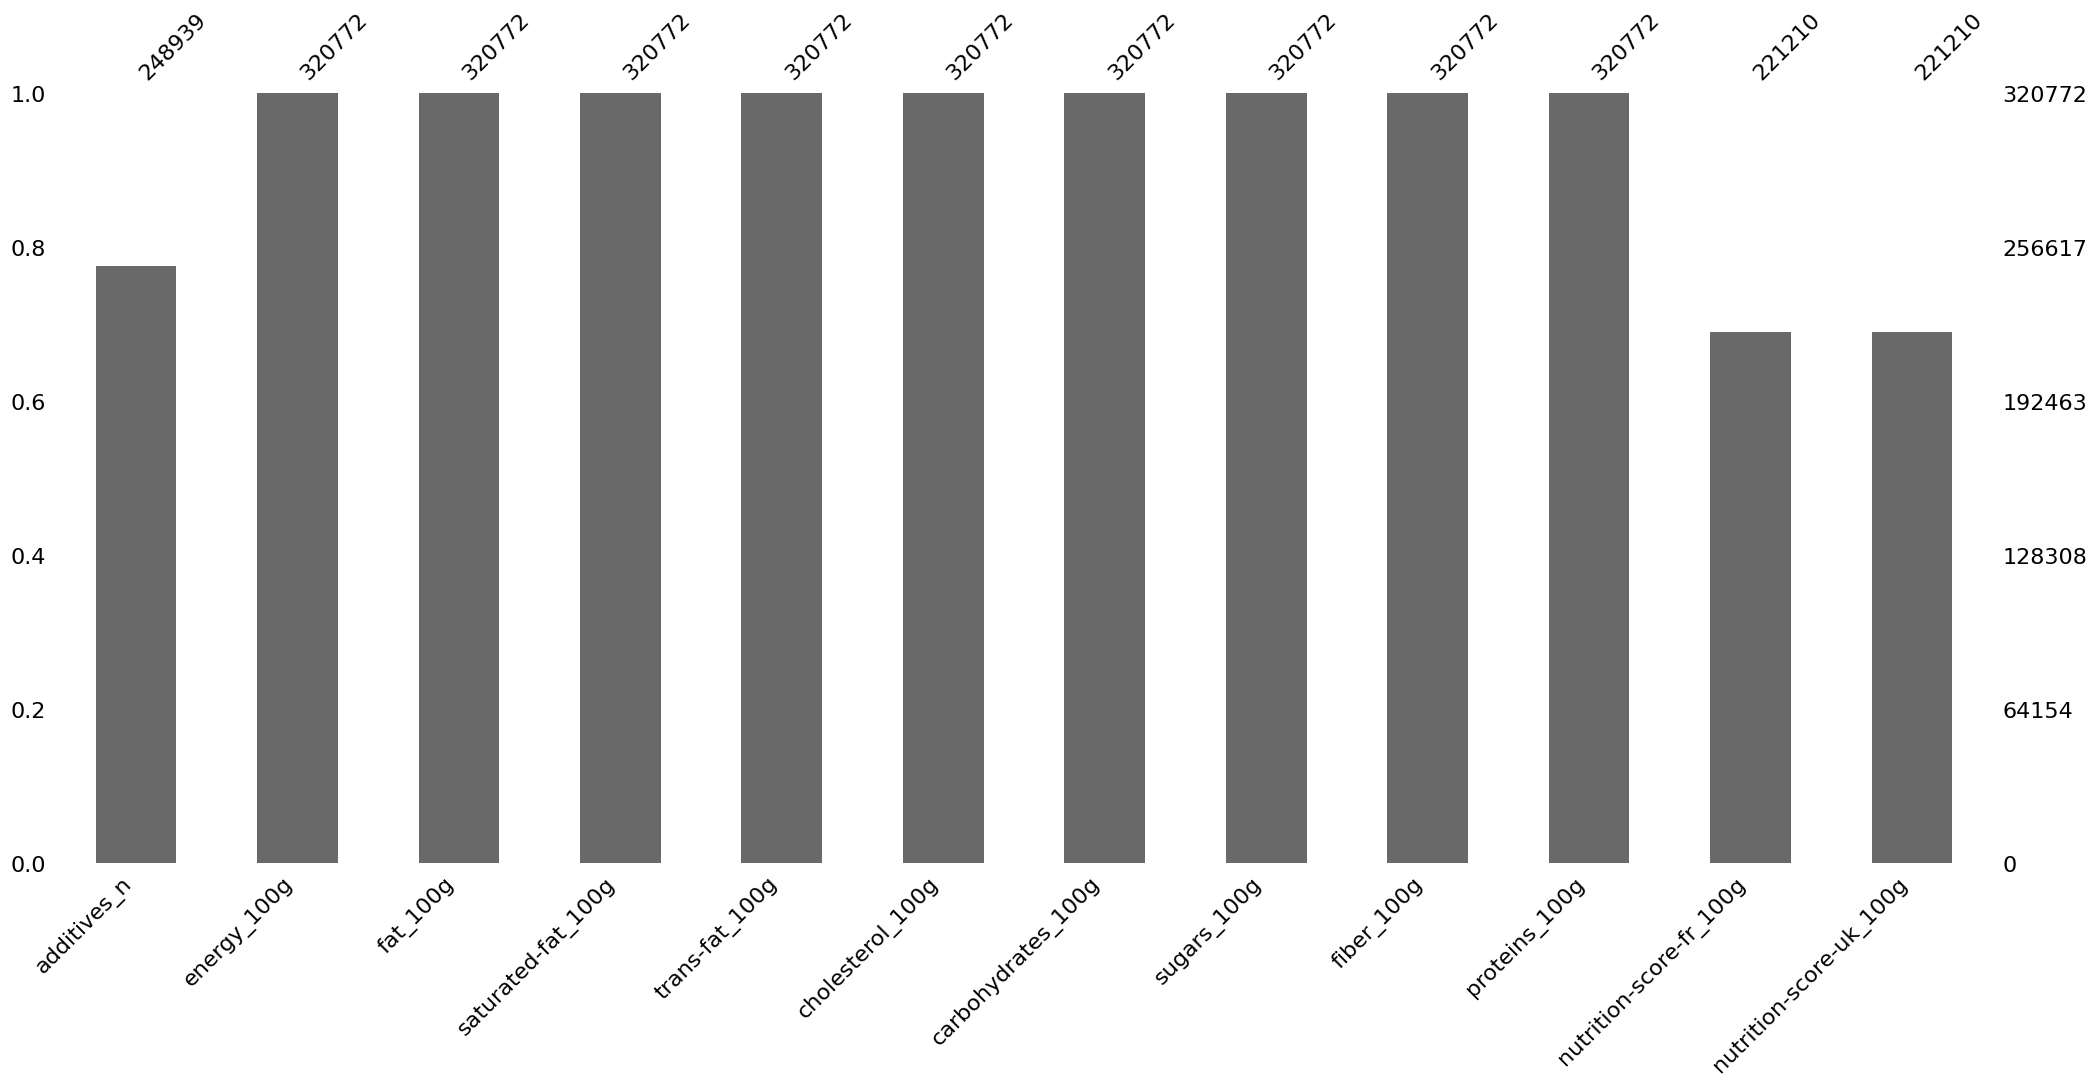

In [41]:
DataAnalysis.show_columns_population(df_without_str_columns, type='bar')

In [42]:
# remove rows with NaN
df_without_str_columns = df_without_str_columns.dropna()

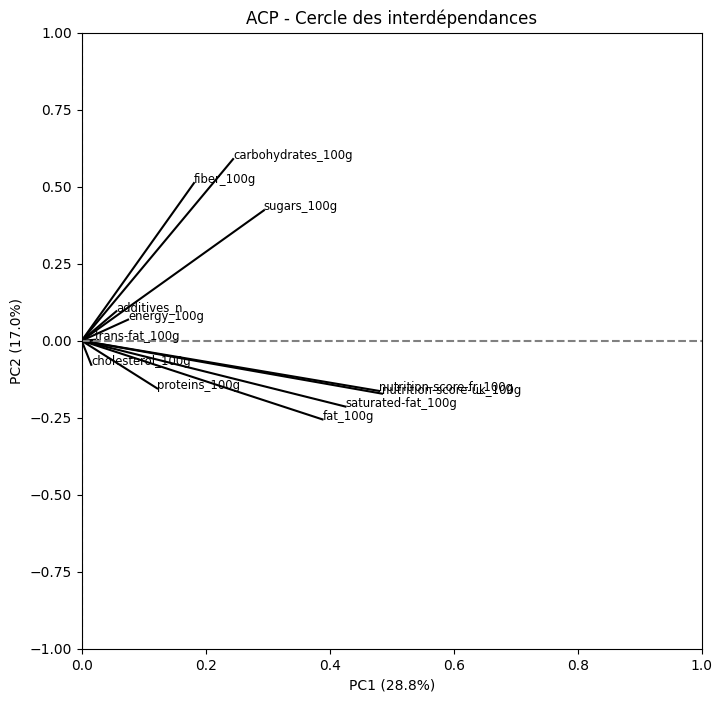

In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Normalisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_without_str_columns)

# ACP
pca = PCA()
pca_result = pca.fit(scaled_data)

# Visualisation
plt.figure(figsize=(8, 8))
for i, (x, y) in enumerate(zip(pca.components_[0], pca.components_[1])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (label) de la variable
    plt.text(x, y, df_without_str_columns.columns[i], fontsize='smaller')
    
# Définir les limites du graphique et les titres des axes
plt.xlim(0, 1)
plt.ylim(-1, 1)
plt.axvline(0, color='grey', linestyle='--')
plt.axhline(0, color='grey', linestyle='--')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("ACP - Cercle des interdépendances")
plt.grid(False)

plt.show()

In [16]:
# Write df as csv file
df.to_csv('data/clean.csv')